# Notebook 07: The Central Limit Theorem
***

We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [1]:
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pylab as plt 
%matplotlib inline

### Exercise 1- Estimating Means of the Binomial Distributions
*** 
In this exercise we'll look at the sample means of the Binomial distribution when $p=0.5$ (pretty normal) and $p=0.95$ (pretty non-normal). 

**Part A**: Draw at least $10000$ samples from the distribution $Bin(6,0.5)$ and $Bin(6,0.95)$ and make histograms with compatible axes-limits. 

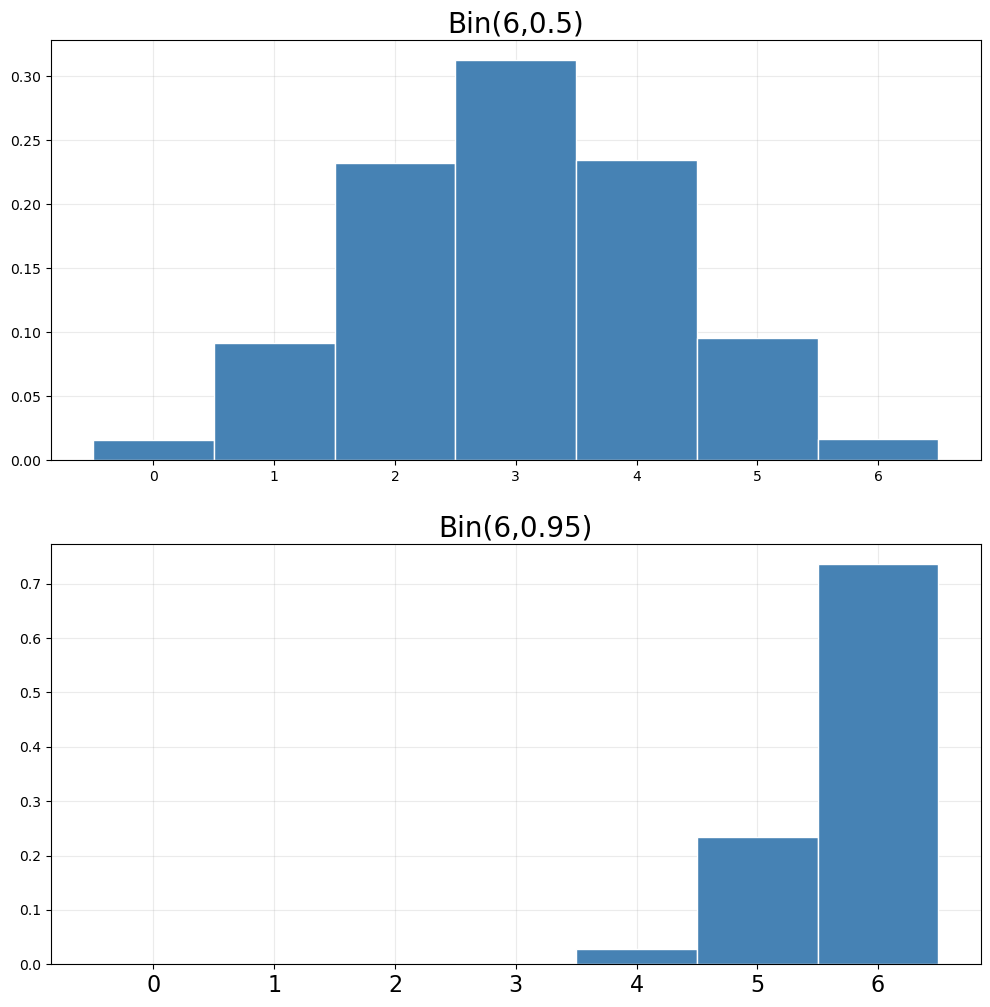

In [2]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,12))

x5 = np.random.binomial(6, 0.5, size=10000)
pd.Series(x5).hist(ax=axes[0], color="steelblue", edgecolor="white", bins=np.linspace(-.5,6.5,8), density=True)
axes[0].grid(alpha=0.25)
axes[0].set_axisbelow(True)
axes[0].set_title("Bin({},{})".format(6,0.5), fontsize=20);
plt.xticks(range(6+1), fontsize=16);

x9 = np.random.binomial(6, 0.95, size=10000)
pd.Series(x9).hist(ax=axes[1], color="steelblue", edgecolor="white", bins=np.linspace(-.5,6.5,8), density=True)
axes[1].grid(alpha=0.25)
axes[1].set_axisbelow(True)
axes[1].set_title("Bin({},{})".format(6,0.95), fontsize=20);
plt.xticks(range(6+1),fontsize=16);

**Part B**: We know from class that the expected value of $Bin(n,p)$ is $E[X] = np$.  Complete the function est_mean_bin below to draw estimates of the mean of $Bin(n,p)$ of a given sample size. Test your function by drawing several means with a sample size of your choice.  Do you get results that are fairly close to $E[X]$ for your given choice of parameter? 

In [3]:
def est_mean_bin(n=6, p=0.5, sample_size=5):
    return #Your code here

In [4]:
print([est_mean_bin(n=6, p=0.5, sample_size=10) for ii in range(5)])

[None, None, None, None, None]


**Part C**: Complete the function sample_bin_dist that computes many independent estimates of the mean of $Bin(n,p)$ and plots their histogram.  Vary the size of the samples in each estimate.  How big does the sample size have to be for $Bin(6,0.5)$ before the sample distribution looks approximately normal? How big does the sample size have to be for $Bin(6,0.95)$ before the sample distribution looks approximately normal? 

In [5]:
def sample_bin_dist(n=6, p=0.5, sample_size=5, num_means=int(5e4)):
    #Your code here:

SyntaxError: incomplete input (4040728328.py, line 2)

In [ ]:
sample_bin_dist(n=6, p=0.5, sample_size=5)

Not quite approximately normal. 

In [ ]:
sample_bin_dist(n=6, p=0.5, sample_size=10)

Symmetric-ish, but still not normal. 

In [ ]:
sample_bin_dist(n=6, p=0.5, sample_size=100)

Ehhh, pretty close. 

In [ ]:
#Now, let's look at the skewed distribution:

sample_bin_dist(n=6, p=0.95, sample_size=5)

Definitely not normal. 

In [ ]:
sample_bin_dist(n=6, p=0.95, sample_size=10)

Definitely not normal. 

In [ ]:
sample_bin_dist(n=6, p=0.95, sample_size=20)

Close, but no cigar. 

In [ ]:
sample_bin_dist(n=6, p=0.95, sample_size=50)

Still kinda non-symmetric. 

In [ ]:
sample_bin_dist(n=6, p=0.95, sample_size=100)

Pretty darn close.  

The take-away here is that it takes longer for the histogram of the sample mean to approximate a normal distribution if the original distribution is very non-normal.

### Exercise 2 - The CLT and Monte Carlo Simulation 
*** 

In this exercise we'll see how we can use the CLT to estimate how good our approximation from a simulation actually is. 

**Part A**: Let $X$ be a random variable taking on the face values of a $d$-sided die after a single roll.  If the die is fair, then $X$ follows a discrete uniform distribution of the form $\textrm{unif}\{1,d\}$. Look up the mean and variance of $\textrm{unif}\{1,d\}$ on [wiki](https://en.wikipedia.org/wiki/Discrete_uniform_distribution) and figure out the specific values of the mean and variance when $d=6$.  


**Solution**: We have 

$$
E[X] = \text{YOUR ANSWER HERE} \quad \textrm{Var}(X) = \text{ YOUR ANSWER HERE }
$$

**Part B**: Write a function sim_die that takes as arguments integers $d$ representing the number of sides on the die and $n$ representing the number of iterations to run your simulation.  The function should return an estimate of the expected value of the die roll, as well as an array of the results of each of the $n$ rolls in the simulation. 

In [ ]:
def sim_die(d=6, n=int(1e3)):
    # YOUR CODE HERE
   

**Part C**: Write a function running_est that takes in your rolls history from **Part B** and computes the running estimate of the expected value after each new sample in the simulation.  That is, your function should return an array $r$ such that 

$$
r[i] = \frac{\textrm{Estimate after i samples}}{i} \quad \textrm{for }i=1,2,\ldots,n
$$

**Solution**:

In [ ]:
def running_est(rolls):
    #YOUR CODE HERE

**Part D**: Let $\bar{X}_n$ the the random variable that estimates $E[X]$ using the first $n$ rolls of the simulation.  Based on the Central Limit Theorem, what distribution does the $\bar{X}_n$ follow when $d=6$. 


**Solution**: For sufficiently large $n$, $\bar{X}_n$ has distribution $N(\mu, \sigma^2/n)$ where $\mu$ and $\sigma$ are the mean and variance of $X$, respectively.  In the case that $d=6$, we have 

$$
\bar{X}_n \sim N\left(3.5, \frac{2.92}{n}\right)
$$

**Part E**: Give an upper and lower bound for a region that $\bar{X}_n$ will fall in with 95% probability when $d=6$ as a function of $n$. 

**Solution**: Let's formulate the problem as finding a value of $\mu$ plus/minus a multiple of the standard deviation that will give us a 95% bound.  Note that $\sqrt{2.92}= 1.71$.  We then have 


$$
P\left(3.5 - y\cdot\frac{1.71}{\sqrt{n}} \leq \bar{X}_n \leq 3.5 + y\cdot\frac{1.71}{\sqrt{n}} \right) = 0.95
$$

Converting to a standard unit normal, we have 

$$
3.5 \pm y\cdot\frac{1.71}{\sqrt{n}} \rightarrow \left[3.5 \pm y\cdot\frac{1.71}{\sqrt{n}} - 3.5\right] \bigg/\frac{1.71}{\sqrt{n}} = \pm y 
$$

Thus, if $Z$ is a standard normal random variable we want to choose $y$, so that 

$$
P(-y \leq Z \leq y) = 0.95
$$

Note that this occurs when $y$ is the $97.5$th percentile of $N(0,1)$.  We can check this value using Python 

In [ ]:
print("y = {:.3f}".format(stats.norm.ppf(.975)))

Thus, with 95% probability, we expect our running estimate of the mean to fall in the interval 

$$
3.5 - 1.96\cdot\frac{1.71}{\sqrt{n}} \leq \bar{X}_n \leq 3.5 + 1.96\cdot\frac{1.71}{\sqrt{n}}
$$

Note that as $n$ increases (i.e. we run more iterations of the simulation) the interval around the true mean shrinks.  The coefficients in the $\pm$ terms then give us an idea how large $n$ should be if we want our estimate to be particularly close to the true mean of $\mu = 3.5$. 

**Part F**: The following function takes the number of sides of the dice and your array of running estimates of the mean and plots the trajectory of the running estimate.  If you set the bounds flag to True it plots a shaded region enclosing the mean.  Currently the shaded region is a constant interval.  Your job in this part of the exercise is to modify the array err95 so that the shaded region depicts the 95% confidence interval around the mean of the estimator. 

**Note**: Tip: make your implementation general with respect to the number of sides on the dice.

In [ ]:
def running_plot(d, r, bounds=False):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
    ax.plot(range(1,len(r)+1),r, color="steelblue")
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_ylim([np.mean(range(1,d+1))-1.5, np.mean(range(1,d+1))+1.5])
    ax.set_xlim([1,len(r)])
    ax.set_xlabel("iteration", fontsize=16)
    ax.set_ylabel("estimate", fontsize=16)
    
    mu = np.mean(range(1,d+1))
    var = ((d-1+1)**2-1)/12
    sd = np.sqrt(var)
    
    if bounds: 
        err95 = np.ones(len(r))  #YOUR UPDATED CODE HERE
        ax.fill_between(range(1,len(r)+1), mu+err95, mu-err95, color="steelblue", alpha=0.2)    #YOUR UPDATED CODE HERE
               

In [ ]:
d=6
x, rolls = sim_die(d=d, n=int(1e3))    
r = running_est(rolls)
running_plot(d,r,bounds=True)

**Part G**: If you run your simulation enough times, you'll eventually get a case where the running estimate wanders outside of the shaded region.  How can you explain this? 

**Solution**: YOUR ANSWER HERE

**Part F**: If you didn't make your bounds estimate general in **Part F**, go back and do so now.  Then run the experiment for dice with increasing number of sides.  What differences do you notice in the trajectory and confidence interval?  How can you explain the differences? 

In [ ]:
d=6
x, rolls = sim_die(d=d, n=int(1e4))    
r = running_est(rolls)
running_plot(d,r,bounds=True)

In [ ]:
d=20
x, rolls = sim_die(d=d, n=int(1e4))    
r = running_est(rolls)
running_plot(d,r,bounds=True)

In [ ]:
d=50
x, rolls = sim_die(d=d, n=int(1e4))    
r = running_est(rolls)
running_plot(d,r,bounds=True)

**Solution**: YOUR ANSWER HERE